In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
''' Sampled dataset from BankSim Dataset'''
baseline_data = pd.read_csv('dataset.csv')
''' Inplace Shuffling the data in dataframe'''
baseline_data = baseline_data.sample(frac=1).reset_index(drop=True)
baseline_data.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,92,'C908718101','3','F','28007','M85975013','28007','es_food',95.32,0
1,24,'C1517820871','3','F','28007','M855959430','28007','es_hyper',10.53,0
2,118,'C1423828273','2','M','28007','M1823072687','28007','es_transportation',9.33,0
3,118,'C369566106','4','M','28007','M1888755466','28007','es_otherservices',187.25,1
4,172,'C1361248894','2','F','28007','M348934600','28007','es_transportation',28.99,0


In [8]:
baseline_data.isnull().values.any()

False

In [9]:
''' Getting stastics of Unique data'''
data_stats_unique = ""
for column in baseline_data:
    data_stats_unique +="{}: {} \n".format(column, baseline_data[column].unique().size)
print("Unique Parameters per Each column")
print(data_stats_unique)

Unique Parameters per Each column
step: 180 
customer: 3938 
age: 8 
gender: 4 
zipcodeOri: 1 
merchant: 50 
zipMerchant: 1 
category: 15 
amount: 20662 
fraud: 2 



# Data Distribution

In [10]:
''' Data distribution of fraud and non-fraud data'''
complete_data = baseline_data.shape[0]
non_fraud_data = baseline_data[baseline_data.fraud == 0].step.count()
fraud_data = complete_data - non_fraud_data

print("The non-fraud data comprises of {} datapoints, which is equivalent to {} % of the dataset".format(non_fraud_data, round(100 *non_fraud_data/complete_data, 2)))
print("The fraudulent data comprises of {}datapoints, which is equivalent to {} % of the dataset".format(fraud_data, round(100 *fraud_data/complete_data,2)))

The non-fraud data comprises of 181635 datapoints, which is equivalent to 96.19 % of the dataset
The fraudulent data comprises of 7200datapoints, which is equivalent to 3.81 % of the dataset


In [11]:
''' Separating labels from data'''
classes = baseline_data.fraud
baseline_features = baseline_data.drop('fraud', axis =1)
baseline_features.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount
0,92,'C908718101','3','F','28007','M85975013','28007','es_food',95.32
1,24,'C1517820871','3','F','28007','M855959430','28007','es_hyper',10.53
2,118,'C1423828273','2','M','28007','M1823072687','28007','es_transportation',9.33
3,118,'C369566106','4','M','28007','M1888755466','28007','es_otherservices',187.25
4,172,'C1361248894','2','F','28007','M348934600','28007','es_transportation',28.99


In [12]:
''' Dropping some irrelevant features'''
baseline_features =  baseline_features.drop(['step','zipcodeOri', 'zipMerchant', 'customer'], axis = 1)
baseline_features.head()

,age,gender,merchant,category,amount
0,'3','F','M85975013','es_food',95.32
1,'3','F','M855959430','es_hyper',10.53
2,'2','M','M1823072687','es_transportation',9.33
3,'4','M','M1888755466','es_otherservices',187.25
4,'2','F','M348934600','es_transportation',28.99


In [15]:
from sklearn.model_selection import * 
from sklearn.metrics import fbeta_score, accuracy_score,precision_recall_fscore_support, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [13]:
''' Normalising the data'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
baseline_data[['amount', 'fraud']] = scaler.fit_transform(baseline_data[['amount', 'fraud']])
baseline_features.amount = baseline_data.amount
baseline_features.head()

,age,gender,merchant,category,amount
0,'3','F','M85975013','es_food',0.011443
1,'3','F','M855959430','es_hyper',0.001264
2,'2','M','M1823072687','es_transportation',0.001120
3,'4','M','M1888755466','es_otherservices',0.022479
4,'2','F','M348934600','es_transportation',0.003480


In [14]:
''' One-hot encoding the data'''
baseline_onehot  = pd.get_dummies(baseline_features)
baseline_onehot.head()

,amount,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',age_'U',gender_'E',...,category_'es_home',category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
0,0.011443,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.001264,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.001120,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.022479,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.003480,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
def classify_with_kmeans(model,graphModifiedDF,classes):
    '''Training Random Forest of Raw and Graph Features by first clustering and classifying next'''
    from sklearn.cluster import KMeans
    X_trn, X_tst, y_trn, y_tst = train_test_split(graphModifiedDF, classes, test_size=0.20)
    print(type(X_trn))

    n_clusters = len(np.unique(y_trn))
    test = KMeans(n_clusters = n_clusters, random_state=42)
    test.fit(X_trn)

    y_lbls_trn = test.labels_
    y_lbls_tst = test.predict(X_tst)
    for i,j in enumerate(y_lbls_trn):
        X_trn[i] += y_lbls_trn[i]
    for i,j in enumerate(y_lbls_tst):
        X_tst[i] += y_lbls_tst[i]
    print(X_tst.shape)

    clf = model.fit(X_trn, y_trn)
    predictions = clf.predict(X_tst) 
    print(class_accuracy( list(y_tst), predictions))
    print(classification_report(y_tst, predictions))
    return clf

In [40]:
def classify_with_model(model,graphModifiedDF):
    ''' Training Random Forest of Raw and Graph Features included dataset'''
    X_trn, X_tst, y_trn, y_tst = train_test_split(graphModifiedDF, classes, test_size=0.20)

    clf = model.fit(X_trn, y_trn)
    predictions = model.predict(X_tst)
    print(class_accuracy( list(y_tst), predictions))  
    print(classification_report(y_tst, predictions))
    return clf

In [18]:
''' Method to determine accuarcy of fraud and non-fraud separately'''
def class_accuracy(original,predicted):
    correct_1=0
    correct_0=0
    total_1=0
    total_0=0
    for i in range(len(original)):
        if original[i]==1 :
            total_1+=1
            if predicted[i]==1:
                correct_1+=1
        elif original[i]==0 :
            total_0+=1
            if predicted[i]==0:
                correct_0+=1
    accuracy_1=(correct_1/total_1)
    accuracy_0=(correct_0/total_0)
    return [accuracy_1,accuracy_0]
        

In [29]:
def compute_feature_importance(clf_enhanced,graphDF):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib import pyplot
    matplotlib.rcParams.update({'font.size': 22})
    importances = clf_enhanced.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf_enhanced.estimators_],
                axis=0)
    indices = np.argsort(importances)[::-1]
    test = list(graphDF.columns[indices[0:7]])
    plt.figure(figsize=(60,15))
    plt.xlabel("Feature Name", fontsize=30)
    plt.ylabel("Importance ", fontsize=30)
    plt.bar(test, importances[indices[0:7]],
        color="lightgreen", align="center")
    #plt.xticks(range(5), graphDF.columns[indices[0:5]].values())
    plt.xlim([-1, 7])
    plt.show()

In [19]:
'''Training the models on baseline features'''
''' Cross Validation on SVM and RF Models'''
kf = KFold(n_splits=5)
fold_betas = []
fold_accuracy = []
fold_classes_accuracy=[]
kf.get_n_splits(baseline_onehot)

for train_index, test_index in kf.split(baseline_onehot):
    X_train, X_test = baseline_onehot.iloc[train_index], baseline_onehot.iloc[test_index]
    y_train, y_test = classes.iloc[train_index], classes.iloc[test_index]
    clfSVM = SVC()
    clfSVM.fit(X_train,y_train)
    clfRandomForest = RandomForestClassifier()
    clfRandomForest.fit(X_train,y_train)
    
    predictionsSVM = clfSVM.predict(X_test)
    predictionsRF = clfRandomForest.predict(X_test)
    fold_betas.append({"SVM": fbeta_score( y_test, predictionsSVM, average='macro', beta=1),
                       "RF": fbeta_score( y_test, predictionsRF, average='macro', beta=1) })
    
    fold_accuracy.append({"SVM": accuracy_score( y_test, predictionsSVM),
                       "RF": accuracy_score(y_test, predictionsRF) })
    fold_classes_accuracy.append({"SVM": class_accuracy( list(y_test), predictionsSVM),
                       "RF": class_accuracy(list(y_test), predictionsRF) })
    print('SVM Report')
    print(classification_report(y_test, predictionsSVM))
    print('RF Report')
    print(classification_report(y_test, predictionsRF))
    
print(fold_classes_accuracy)

SWM Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     36340
           1       0.84      0.53      0.65      1427

    accuracy                           0.98     37767
   macro avg       0.91      0.76      0.82     37767
weighted avg       0.98      0.98      0.98     37767

RF Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     36340
           1       0.76      0.74      0.75      1427

    accuracy                           0.98     37767
   macro avg       0.87      0.87      0.87     37767
weighted avg       0.98      0.98      0.98     37767

SWM Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     36245
           1       0.87      0.52      0.65      1522

    accuracy                           0.98     37767
   macro avg       0.93      0.76      0.82     37767
weighted avg       0.98      0.98      0.9

In [21]:
''' Method for calculating the average for only one classifier'''
def calculate_average_for_fold(fold_data, model_names):
    model_1_sum = 0
    model_2_sum = 0

    for dat in fold_data:
        model_1_sum += dat[model_names[0]]/len(fold_data)
        model_2_sum += dat[model_names[1]]/len(fold_data)

    print("Model {} average: {}".format(model_names[0], model_1_sum))
    print("Model {} average: {}".format(model_names[1], model_2_sum))

In [22]:
''' Method for calculating the average for multiple classifier'''
def calculate_average_for_classes(fold_data_classes,model_names):
    model_1_sum_1 = 0
    model_1_sum_0 = 0
    model_2_sum_1 = 0
    model_2_sum_0 = 0

    for data in fold_data_classes:
        model_1_sum_1 += data[model_names[0]][0]/len(fold_data_classes)
        model_1_sum_0 += data[model_names[0]][1]/len(fold_data_classes)
        model_2_sum_1 += data[model_names[1]][0]/len(fold_data_classes)
        model_2_sum_0 += data[model_names[1]][1]/len(fold_data_classes)
    
    print('classes1')
    print("Model {} average: {}".format(model_names[0], model_1_sum_1))
    print('classes0')
    print("Model {} average: {}".format(model_names[0], model_1_sum_0))
    print('classes1')
    print("Model {} average: {}".format(model_names[1], model_2_sum_1))
    print('classes0')
    print("Model {} average: {}".format(model_names[1], model_2_sum_0))

In [23]:
print("---------- Betas Average ----------")
calculate_average_for_fold(fold_betas, ["SVM", "RF"])
print("---------- Accuracy Averages -----------")
calculate_average_for_fold(fold_accuracy, ["SVM", "RF"])
print("---------- Classes Accuracy Averages -----------")
calculate_average_for_classes(fold_classes_accuracy, ["SVM", "RF"])


---------- Betas Average ----------
Model SVM average: 0.8223262561082383
Model RF average: 0.8732679448083202
---------- Accuracy Averages -----------
Model SVM average: 0.9784467921730611
Model RF average: 0.9815447348214048
---------- Classes Accuracy Averages -----------
classes1
Model SVM average: 0.5388318322187946
classes0
Model SVM average: 0.995882299418525
classes1
Model RF average: 0.750852881651855
classes0
Model RF average: 0.9906963488272815


# Optimization Of Algorithm Utilizing Hyperparameter

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split

In [25]:
''' Improving RF by utilizing Hyperparameters'''

''' Spliting the data into training and testing data'''
XTrn, XTst, yTrn, yTst = train_test_split(baseline_onehot, 
                                                    classes, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

classifer = RandomForestClassifier()
classifer2 = RandomForestClassifier()

classifer2.fit(XTrn, yTrn)

predictions = classifer2.predict(XTst)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
arguments = {'n_estimators': [5, 10 , 100],
              'min_samples_split': [2, 10, 50],
              'max_features': ["sqrt", "log2"],
             }

# TODO: Make an fbeta_score scoring object using make_scorer()
f1_score = make_scorer(fbeta_score, beta=1)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
gridObject = GridSearchCV(classifer, param_grid=arguments, scoring=f1_score)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
fitGrid = gridObject.fit(XTrn, yTrn)

# Get the estimator
bestClassifer = fitGrid.best_estimator_

# Make predictions using the unoptimized and model
predictions = (classifer.fit(XTrn, yTrn)).predict(XTst)
relevantPredictions = bestClassifer.predict(XTst)


In [26]:
''' Printing the report'''
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(yTst, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(yTst, predictions, beta = 1)))
print("Accuracy score on the testing data for Classes 1:"+str(class_accuracy(list(yTst), predictions)[0]))
print("Accuracy score on the testing data for Classes 0:"+str(class_accuracy(list(yTst), predictions)[1]))
print('RF Report')
print(classification_report(yTst, predictions))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(yTst, relevantPredictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(yTst, relevantPredictions, beta = 1)))
print("Accuracy score on the testing data for Classes 1:"+str(class_accuracy(list(yTst), relevantPredictions)[0]))
print("Accuracy score on the testing data for Classes 0:"+str(class_accuracy(list(yTst), relevantPredictions)[1]))
print('RF Optimized Report')
print(classification_report(yTst, relevantPredictions))

Unoptimized model
------
Accuracy score on testing data: 0.9819
F-score on testing data: 0.7567
Accuracy score on the testing data for Classes 1:0.7521186440677966
Accuracy score on the testing data for Classes 0:0.9908118071029682
RF Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     36351
           1       0.76      0.75      0.76      1416

    accuracy                           0.98     37767
   macro avg       0.88      0.87      0.87     37767
weighted avg       0.98      0.98      0.98     37767


Optimized Model
------
Final accuracy score on the testing data: 0.9870
Final F-score on the testing data: 0.8148
Accuracy score on the testing data for Classes 1:0.7627118644067796
Accuracy score on the testing data for Classes 0:0.9957360182663476
RF Optimized Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     36351
           1       0.87      0.76      0.81      14

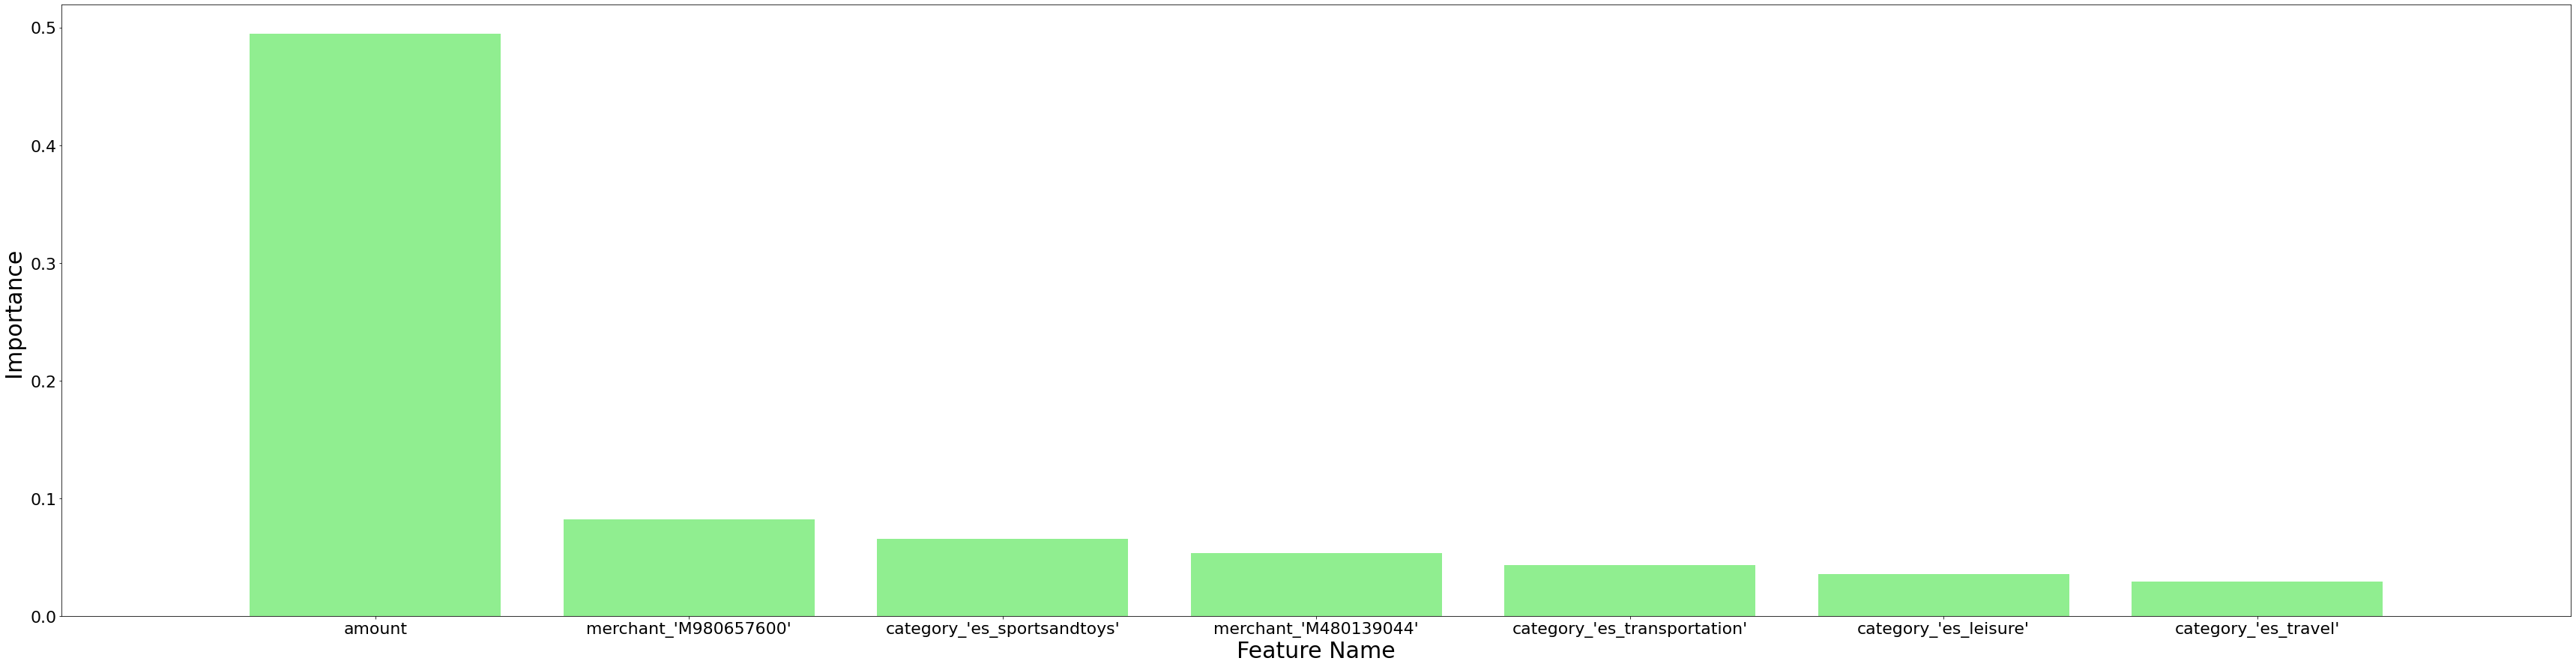

In [30]:
compute_feature_importance(bestClassifer,baseline_onehot)

In [33]:
rf_with_kmeans = classify_with_kmeans(bestClassifer,baseline_onehot.values,classes.values)

<class 'numpy.ndarray'>
(37767, 78)
[0.7553707553707554, 0.9955951987666557]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     36324
           1       0.87      0.76      0.81      1443

    accuracy                           0.99     37767
   macro avg       0.93      0.88      0.90     37767
weighted avg       0.99      0.99      0.99     37767



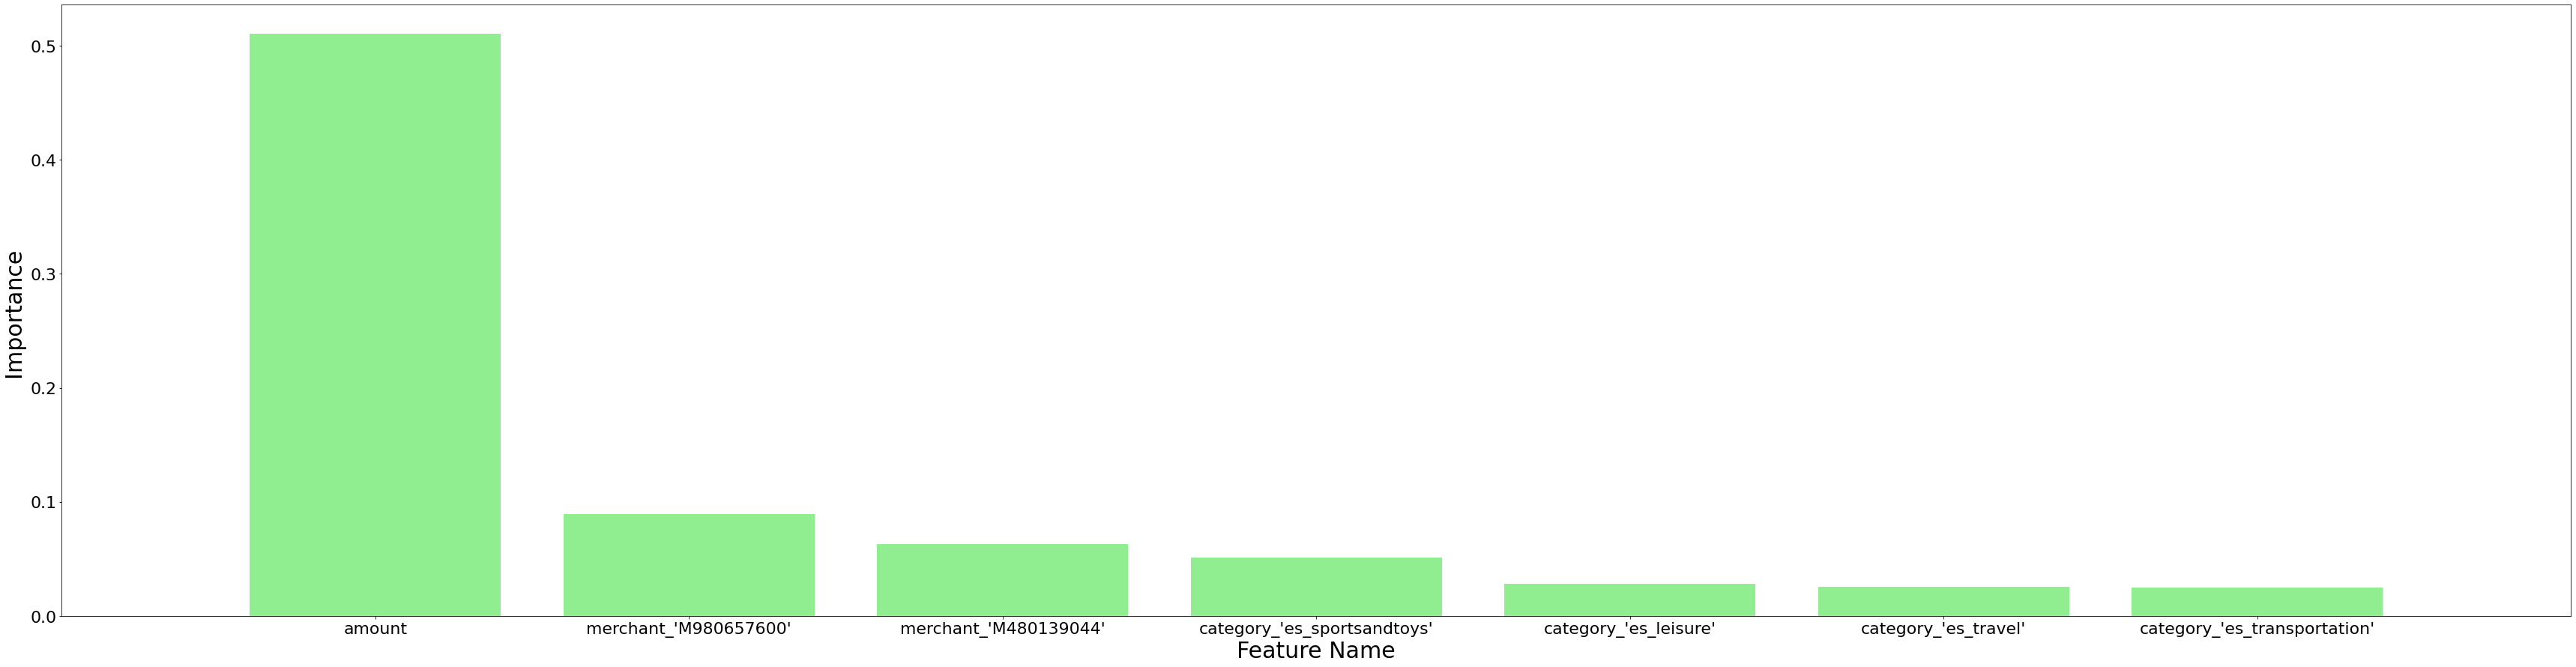

In [35]:
compute_feature_importance(rf_with_kmeans,baseline_onehot)

In [39]:
from xgboost import XGBClassifier
xgClassify = classify_with_model(XGBClassifier(),baseline_onehot)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[22:56:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.7428170988086895, 0.9968904788112273]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     36340
           1       0.90      0.74      0.82      1427

    accuracy                   